In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['OMP_NUM_THREADS'] = '1'
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = 'Mall_Customers.csv'
mall_customers = pd.read_csv(file_path)
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


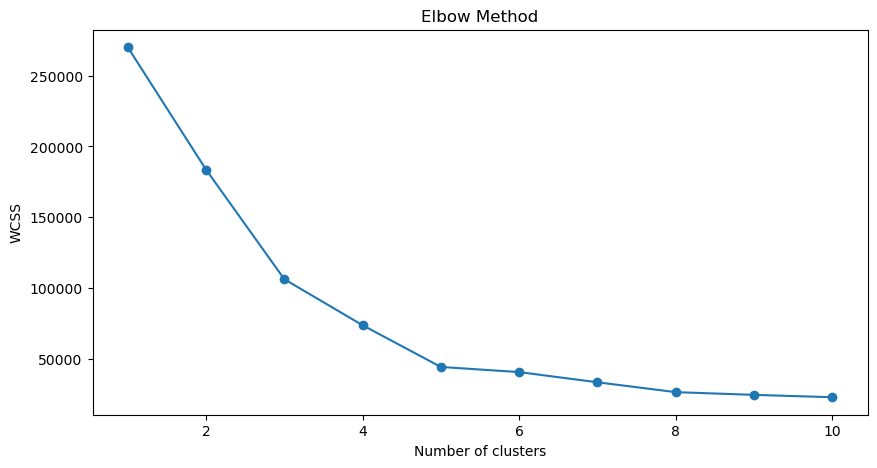

In [3]:
X = mall_customers[['Annual Income (k$)', 'Spending Score (1-100)']]

wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [4]:
features = mall_customers[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling the data to normalize it
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

In [6]:
mall_customers['Cluster'] = kmeans.labels_

Inertia: 65.56840815571681


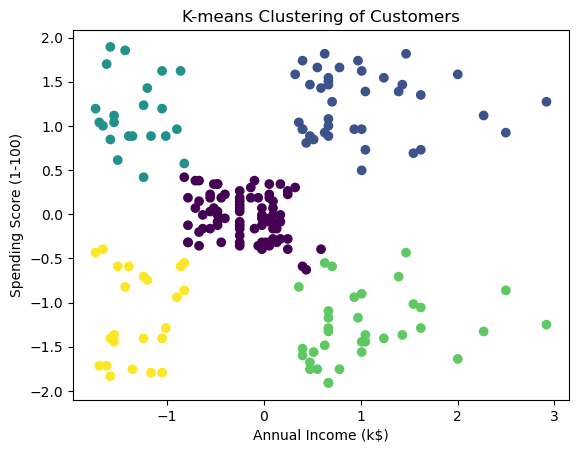

In [7]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [16]:
numeric_columns = mall_customers.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop('CustomerID')
numeric_columns = numeric_columns.drop('Age')
# Group by cluster and calculate the mean for each cluster
cluster_analysis = mall_customers.groupby('Cluster')[numeric_columns].mean()
new_cluster_analysis = cluster_analysis.reset_index(drop=True)
new_cluster_analysis

,Annual Income (k$),Spending Score (1-100),Cluster
0,55.296296,49.518519,0.0
1,86.538462,82.128205,1.0
2,25.727273,79.363636,2.0
3,88.200000,17.114286,3.0
4,26.304348,20.913043,4.0
